In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
properties = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell-six_months.csv', low_memory=False)
properties['created_on'] = pd.to_datetime(properties['created_on'], format='%Y-%m')

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 27 columns):
id                            121220 non-null object
created_on                    121220 non-null datetime64[ns]
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           

In [4]:
properties.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [5]:
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,5f9403a3bac230379afec9a2601bd6e3db3bc0b9,2017-02-01,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,130ed5140d7492ae631465d2b038668bd7b8436b,2017-02-01,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [6]:
#todas las propiedades son de Argentina?
properties[properties['country_name'] != 'Argentina'].shape

(0, 27)

In [7]:
#cantidad de valores nulos por columna
print(properties.isnull().sum())

id                                 0
created_on                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
d

In [8]:
#cantidad de publicaciones por lugar
properties['place_name'].value_counts()

Córdoba                           9254
Rosario                           8504
Mar del Plata                     6534
Tigre                             3324
Nordelta                          3315
Belgrano                          2992
Palermo                           2885
La Plata                          2534
Caballito                         2273
Pilar                             2228
Villa Urquiza                     1632
Olivos                            1590
Recoleta                          1547
Lomas de Zamora                   1529
Flores                            1354
Ituzaingó                         1340
Villa Crespo                      1331
Capital Federal                   1297
San Telmo                         1216
Morón                             1209
Almagro                           1165
Barrio Norte                      1140
Ramos Mejía                       1127
Martínez                          1058
Lanús                             1048
Escobar                  

In [9]:
#Y por provincia
properties['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [10]:
properties['place_with_parent_names'].value_counts()

|Argentina|Santa Fe|Rosario|                                                              8504
|Argentina|Córdoba|Córdoba|                                                               6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                                    6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                                       3315
|Argentina|Capital Federal|Belgrano|                                                      2992
|Argentina|Capital Federal|Palermo|                                                       2885
|Argentina|Córdoba|                                                                       2648
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|                                                2359
|Argentina|Capital Federal|Caballito|                                                     2273
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|                                                1857
|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La Plat

In [11]:
properties_caba = properties[properties['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties['place_with_parent_names'].str.contains('Bs.As. G.B.A.')]

## Donde se encuentran las propiedades mas caras en cuanto a precio?

En principio deberiamos tener solo en cuenta las propiedas que tienen precio debido a que son las propiedas que nos ayudaran a estimar el valor de nuevas propiedades

In [12]:
properties_with_price = properties_caba[properties_caba['price'].notnull()]
properties_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72494 entries, 0 to 121219
Data columns (total 27 columns):
id                            72494 non-null object
created_on                    72494 non-null datetime64[ns]
operation                     72494 non-null object
property_type                 72494 non-null object
place_name                    72471 non-null object
place_with_parent_names       72494 non-null object
country_name                  72494 non-null object
state_name                    72494 non-null object
geonames_id                   56676 non-null float64
lat-lon                       41537 non-null object
lat                           41537 non-null float64
lon                           41537 non-null float64
price                         72494 non-null float64
currency                      72494 non-null object
price_aprox_local_currency    72494 non-null float64
price_aprox_usd               72494 non-null float64
surface_total_in_m2           51797 non-null

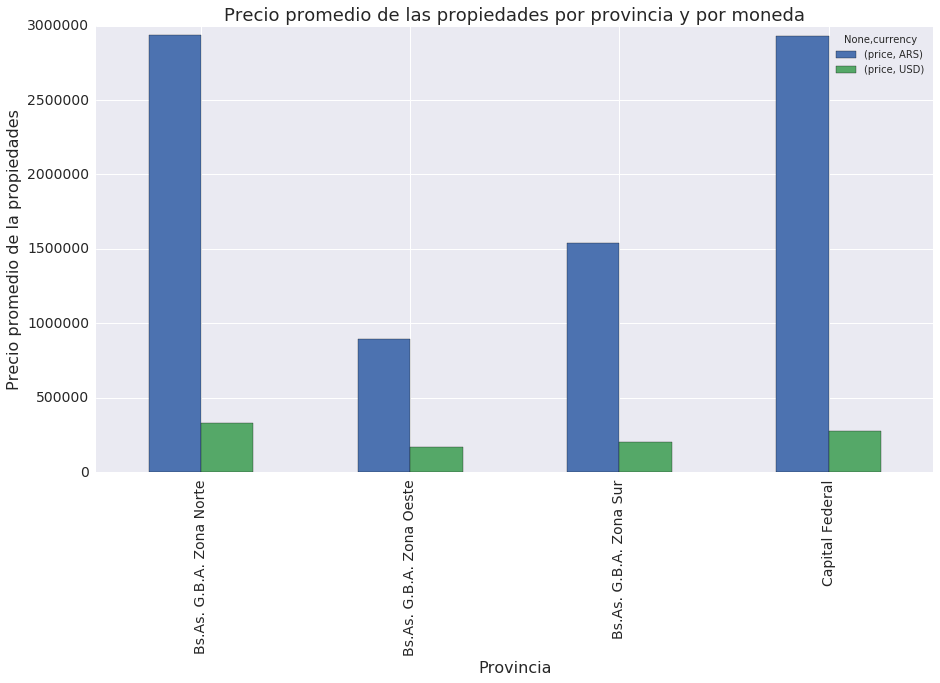

In [13]:
properties_with_price.loc[properties_with_price['currency'].isin(['ARS','USD'])\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8) , stacked=False, fontsize=14);
plt.title('Precio promedio de las propiedades por provincia y por moneda', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de la propiedades', fontsize=16);

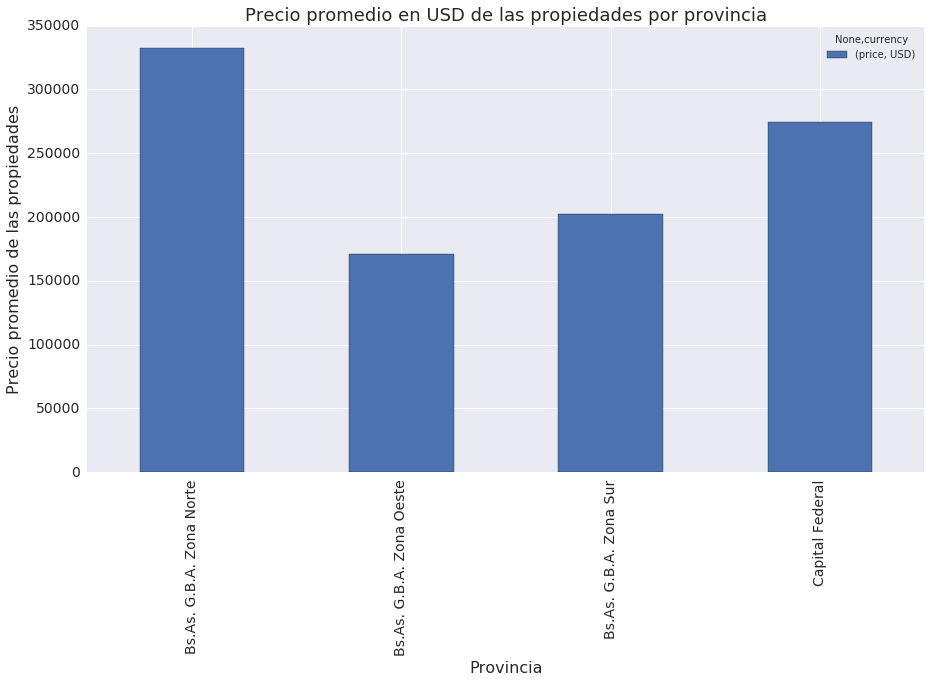

In [14]:
properties_with_price.loc[properties_with_price['currency'] == 'USD'\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8), fontsize=14);
plt.title('Precio promedio en USD de las propiedades por provincia', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

## Como varian los precios segun la fecha en que se publicaron?

In [15]:
def date_to_year_month(d):
    return str(d.year)+"-"+("%02d" % (d.month,))

properties_caba['created_on'] = properties_caba['created_on'].map(date_to_year_month)

properties_grouped_bycreatedon = properties_caba.loc[properties_caba['currency'] == 'USD',['state_name','price', 'created_on']]\
    .groupby(['created_on']).agg(['mean','count'])
    
#properties_grouped_bycreatedon.reset_index(inplace=True)
properties_grouped_bycreatedon.tail()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


price       
                     mean  count
created_on                      
2017-04     301075.290881   7161
2017-05     254373.824710   7770
2017-06     264429.411047   8364
2017-07     266355.374764  38096
2017-08     251060.000000    110

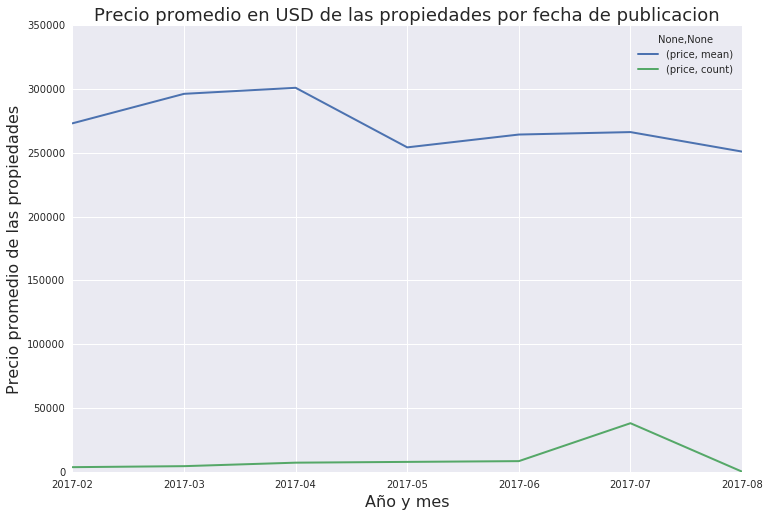

In [16]:
properties_grouped_bycreatedon.plot(rot=0, linewidth=2,figsize=(12,8));
plt.title('Precio promedio en USD de las propiedades por fecha de publicacion', fontsize=18);
plt.xlabel('Año y mes', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

Podemos ver como en el ultimo año incrementaron la cantidad de publicaciones pero a su vez como disminuyo el precio promedio de las propiedades

## Existe alguna relacion entre el precio de la propiedad y la superficie total/cubierta en m2?
Creemos que por al menos en Capital Federal las propiedades que tienen una superficie descubierta son mas caras que las que no

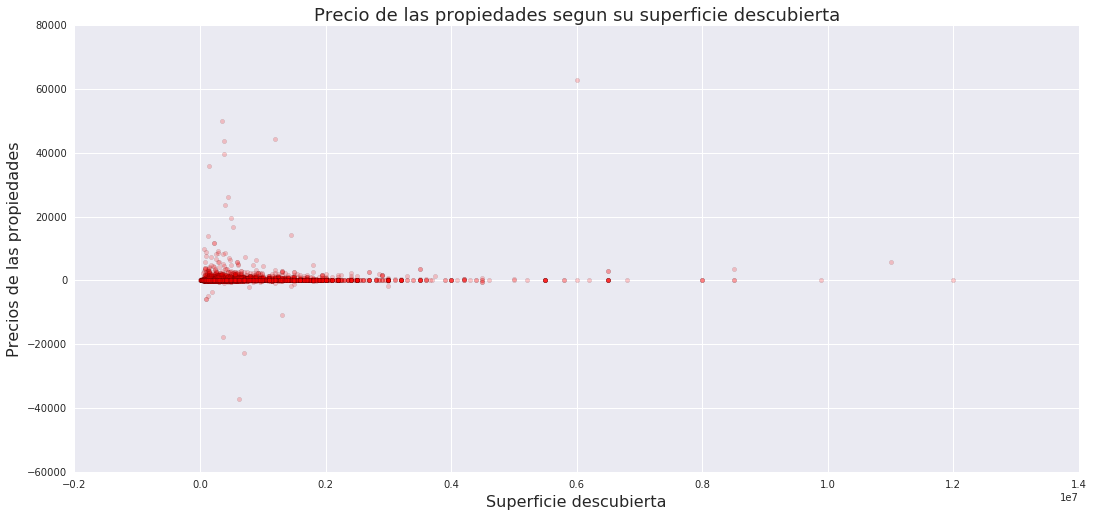

In [17]:
#agarro las propiedades que tienen tanto superficies cubiertas como totales
properties_with_price_and_surface = properties_with_price[properties_with_price['surface_total_in_m2'].notnull()]

properties_with_price_and_surface = properties_with_price_and_surface.assign(surface_discovered_in_m2 = \
    properties_with_price_and_surface['surface_total_in_m2']-properties_with_price_and_surface['surface_covered_in_m2'])

properties_with_price_and_surface.loc[properties_with_price_and_surface['currency'] == 'USD',\
   ['surface_total_in_m2','surface_covered_in_m2','surface_discovered_in_m2','price','price_per_m2']]\
    .plot.scatter('price','surface_discovered_in_m2',alpha=0.20,figsize=(18,8), color='red');
plt.title('Precio de las propiedades segun su superficie descubierta', fontsize=18);
plt.xlabel('Superficie descubierta', fontsize=16);
plt.ylabel('Precios de las propiedades', fontsize=16);

No se ve ninguna relacion. Deberiamos comparar la superficie cubierta contra la total y ver que encontramos.

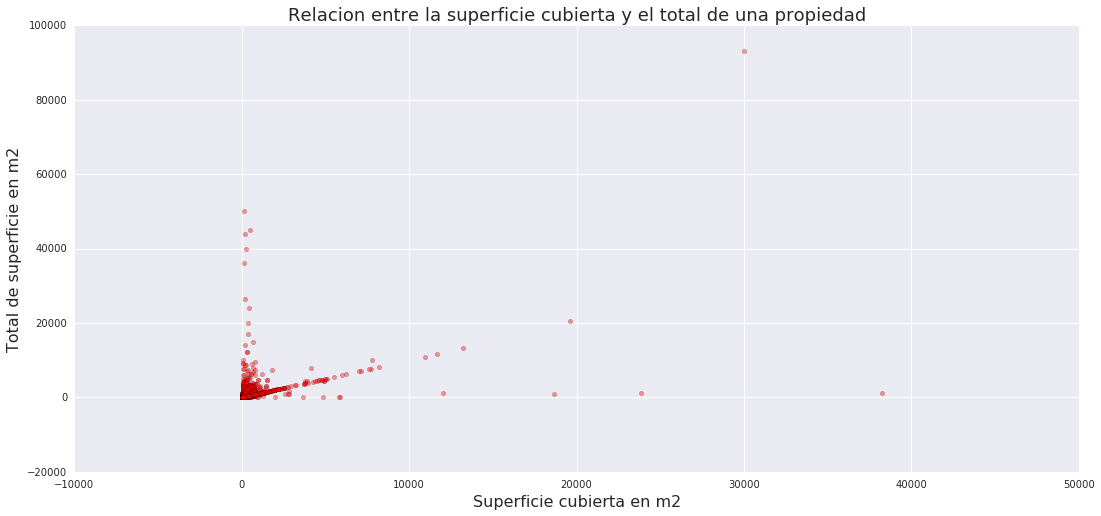

In [18]:
properties_with_price_and_surface.loc[:,['surface_covered_in_m2','surface_total_in_m2']]\
    .plot.scatter('surface_covered_in_m2','surface_total_in_m2', alpha=0.40,figsize=(18,8), color='red')
plt.title('Relacion entre la superficie cubierta y el total de una propiedad', fontsize=18);
plt.xlabel('Superficie cubierta en m2', fontsize=16);
plt.ylabel('Total de superficie en m2', fontsize=16);

Parece haber una especia de tendencia lineal en ciertas propiedades, sin embargo, no parece ser parametro de nada

## Existe alguna relacion entre precios y cantidad de habitaciones o pisos?

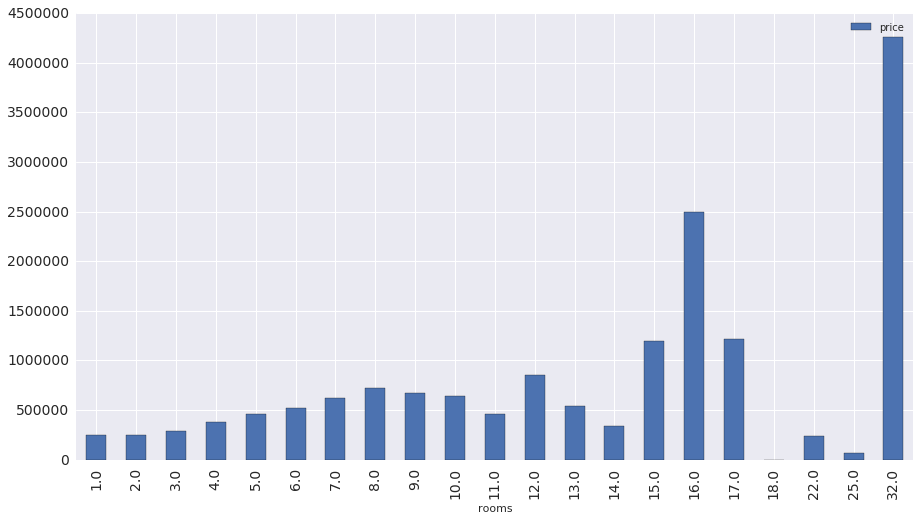

In [19]:
properties_caba[properties_caba['rooms'].notnull()][['rooms','price']]\
    .groupby(['rooms']).mean()\
    .plot(kind='bar', figsize=(15,8), fontsize=14);

Parece haber poca cantidad de propiedades en algunos promedios. Entonces vamos a pedir un minimo de propiedades a graficar

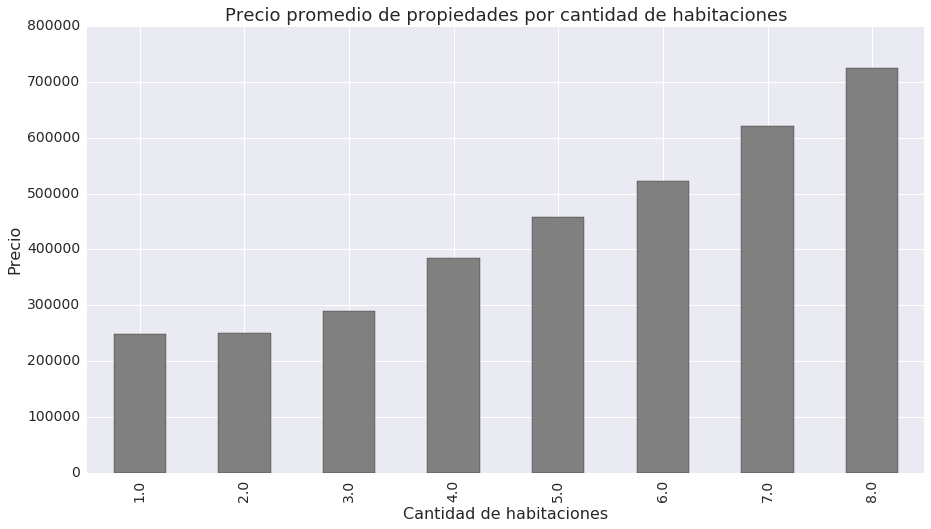

In [20]:
grouped_properties_byrooms = properties_caba[properties_caba['rooms'].notnull()][['rooms','price']]\
    .groupby(['rooms']).agg([np.mean,np.size])
grouped_properties_byrooms.loc[grouped_properties_byrooms['price','size']>50,:]\
    .unstack()['price','mean'].plot(kind='bar', figsize=(15,8), fontsize=14, color='gray');
plt.title('Precio promedio de propiedades por cantidad de habitaciones', fontsize=18);
plt.xlabel('Cantidad de habitaciones', fontsize=16);
plt.ylabel('Precio', fontsize=16);

Como  era de esperarse, a medida que aumentan la cantida de habitaciones aumenta el precio. Seguramente pasa lo mismo con la cantidad de pisos

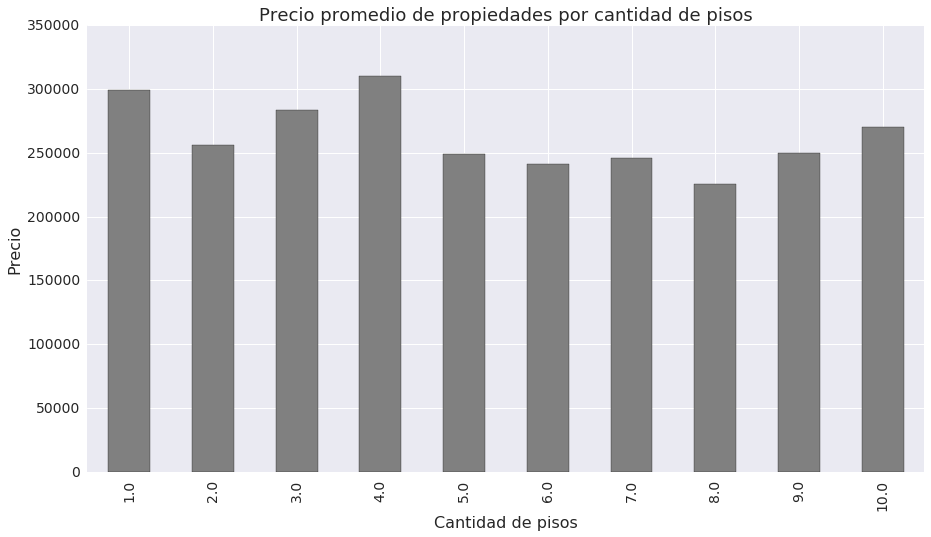

In [21]:
grouped_properties_byfloor = properties_caba[properties_caba['floor'].notnull()]\
    [['floor','price']].groupby(['floor']).agg([np.mean,np.size])
grouped_properties_byfloor.loc[grouped_properties_byfloor['price','size']>100,:]\
    .unstack()['price','mean'].plot(kind='bar', figsize=(15,8), fontsize=14, color='gray');
plt.title('Precio promedio de propiedades por cantidad de pisos', fontsize=18);
plt.xlabel('Cantidad de pisos', fontsize=16);
plt.ylabel('Precio', fontsize=16);

#### Pero de estos, cuantos son departamentos y cuantos PH o casas?

Se nos ocurrio hacer un scatter plot que mostrar la cantidad de contra la cantidad de habitaciones donde podemos agregarle dos dimensiones mas: el tamano de las burbujas puede indicar el precio de los inmuebles y el color de las mismas puede indicar el tipo de propiedad. Con esto logramos relacionar 4 dimensiones diferentes en un solo grafico

In [44]:
properties_caba['property_type'].value_counts()

apartment    46784
house        27099
PH            4423
store         2844
Name: property_type, dtype: int64

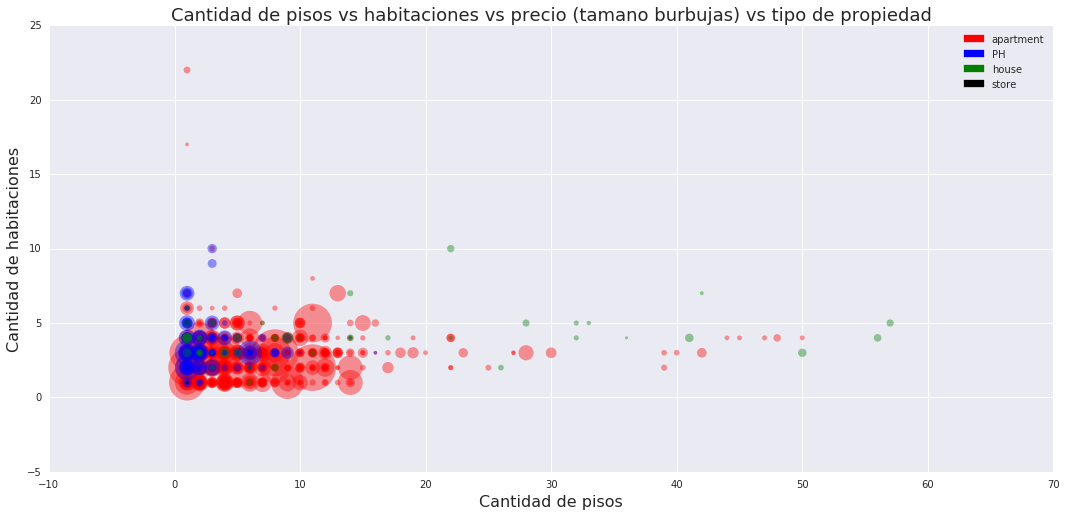

In [121]:
import matplotlib.patches as mpatches

alpha = 0.40
aspect = 5000
floors = 60

def getForAxis(properties, property_type, axis):
    return properties.loc[(properties['property_type']==property_type) & (properties['floor']<floors),axis]
    
fig, ax = plt.subplots(figsize=(18,8))

#properties_caba.loc[properties_caba['price'].notnull(),:]\
 #   .plot.scatter('floor','rooms'
ax.scatter(getForAxis(properties_caba,'apartment','floor'),getForAxis(properties_caba,'apartment','rooms'), c='red',\
           s=properties_caba['price'].map(lambda x: x/aspect), label='apartment', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'PH','floor'),getForAxis(properties_caba,'PH','rooms'), c='blue', 
         s=properties_caba['price'].map(lambda x: x/aspect), label='PH', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'house','floor'),getForAxis(properties_caba,'house','rooms'), c='green', 
           s=properties_caba['price'].map(lambda x: x/aspect), label='house', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'store','floor'),getForAxis(properties_caba,'store','rooms'), c='black', 
           s=properties_caba['price'].map(lambda x: x/aspect), label='store', alpha=alpha, edgecolors='none')

ax.legend()
ax.grid(True)

NA = mpatches.Patch(color='red', label='apartment')
EU = mpatches.Patch(color='blue', label='PH')
AP = mpatches.Patch(color='green', label='house')
SA = mpatches.Patch(color='black', label='store')
plt.legend(handles=[NA,EU,AP,SA], loc=1)

plt.title('Cantidad de pisos vs habitaciones vs precio (tamano burbujas) vs tipo de propiedad', fontsize=18);
plt.xlabel('Cantidad de pisos', fontsize=16);
plt.ylabel('Cantidad de habitaciones', fontsize=16);

plt.show()

Limitamos la cantidad de pisos a menos de 60 debido a que nos parecia algo ilogico que existan edificios (o hasta casas) con mas de 100 pisos. Este campo se puede modificar con la variable 'floors'